In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Define the data directory
data_dir = '/content/drive/MyDrive/ClassificationUsingCNN/Images'

In [4]:
# Define image size and batch size
img_size = (256, 256)
batch_size = 32

In [5]:
# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
# Generate the training dataset
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    seed=123
)

Found 357 images belonging to 2 classes.


In [7]:
# Generate the validation dataset
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    seed=123
)

Found 88 images belonging to 2 classes.


In [8]:
# Generate the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    seed=123
)

Found 445 images belonging to 2 classes.


In [9]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [10]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [11]:
# Create a new model on top of the pre-trained base model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 8389121 (32.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [14]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20
12/12 [==============================] - 18s 796ms/step - loss: 2.3999 - accuracy: 0.5546 - val_loss: 0.8993 - val_accuracy: 0.5000
Epoch 2/20
12/12 [==============================] - 4s 326ms/step - loss: 0.4629 - accuracy: 0.7787 - val_loss: 0.4538 - val_accuracy: 0.8068
Epoch 3/20
12/12 [==============================] - 4s 290ms/step - loss: 0.2163 - accuracy: 0.9160 - val_loss: 0.3441 - val_accuracy: 0.8409
Epoch 4/20
12/12 [==============================] - 4s 330ms/step - loss: 0.1243 - accuracy: 0.9664 - val_loss: 0.3454 - val_accuracy: 0.8409
Epoch 5/20
12/12 [==============================] - 4s 298ms/step - loss: 0.1167 - accuracy: 0.9636 - val_loss: 0.2814 - val_accuracy: 0.8636
Epoch 6/20
12/12 [==============================] - 3s 264ms/step - loss: 0.0735 - accuracy: 0.9832 - val_loss: 0.2849 - val_accuracy: 0.9091
Epoch 7/20
12/12 [==============================] - 3s 266ms/step - loss: 0.0707 - accuracy: 0.9832 - val_loss: 0.2797 - val_accuracy: 0.9091
Epoch

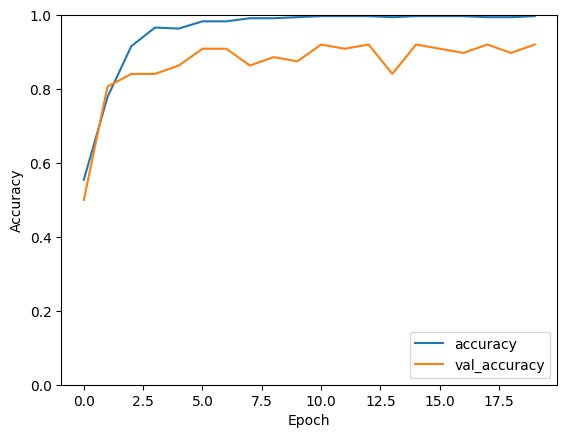

In [15]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

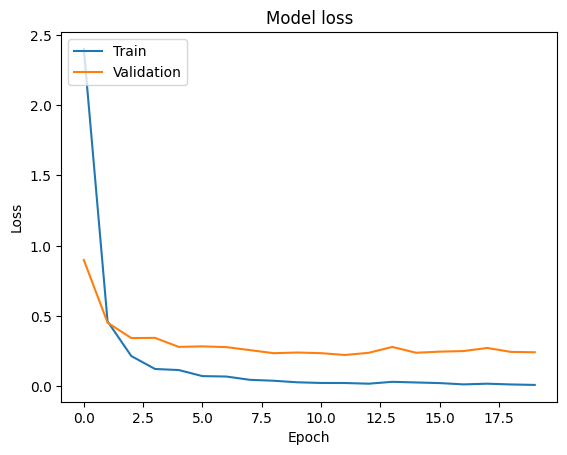

In [16]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
# Evaluate the model on the test set
predictions = model.predict(test_generator)

14/14 [==============================] - 10s 668ms/step


In [18]:
# Convert to binary labels (0 or 1)
y_true = test_generator.classes
y_pred = (predictions > 0.5).astype(int)

In [19]:
# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       198
           1       0.98      0.99      0.98       247

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445



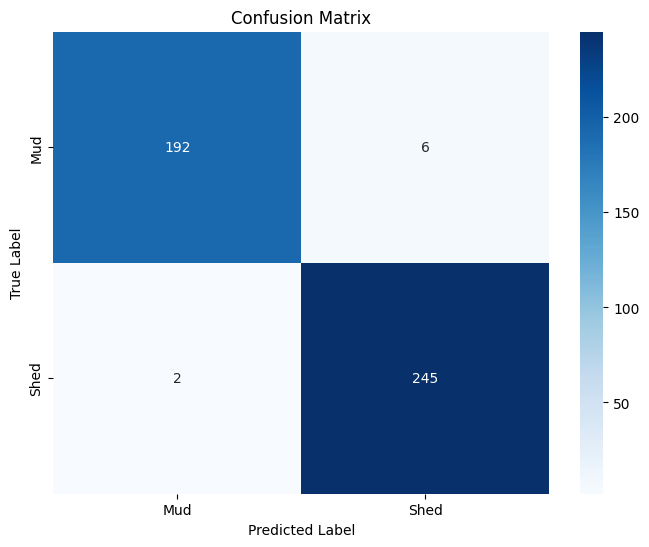

In [20]:
# Print confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Mud', 'Shed'], yticklabels=['Mud', 'Shed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Save the model
model.save('/content/drive/MyDrive/ClassificationUsingVGG16Model')